In [2]:
!pip install detecto

In [0]:
from detecto import core, utils, visualize


In [4]:
!git clone https://github.com/sroshan106/Pen-data-set.git

Cloning into 'Pen-data-set'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 510 (delta 0), reused 0 (delta 0), pack-reused 507
Receiving objects: 100% (510/510), 3.12 MiB | 32.56 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [4]:
ls

Pen-data-set/  sample_data/


In [5]:
cd Pen-data-set

/content/Pen-data-set


In [6]:
ls

images/  images1/


In [0]:
dataset = core.Dataset('/content/Pen-data-set/images/image')

In [0]:
model = core.Model(['pen'])

In [9]:
model.fit(dataset , verbose =1) 

Epoch 1 of 10


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Epoch 2 of 10
Epoch 3 of 10
Epoch 4 of 10
Epoch 5 of 10
Epoch 6 of 10
Epoch 7 of 10
Epoch 8 of 10
Epoch 9 of 10
Epoch 10 of 10


In [10]:
ls

images/  images1/


In [0]:
image = utils.read_image('/content/Pen-data-set/images1/image/a (196).jpg')

In [17]:
predictions = model.predict(image)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [0]:
labels, boxes, scores = predictions

In [19]:
print(scores)

tensor([0.8669, 0.8299, 0.2642, 0.0717])


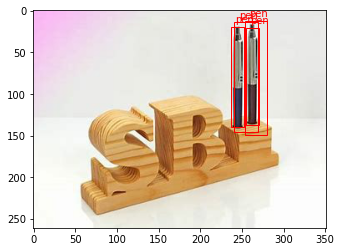

In [20]:
visualize.show_labeled_image(image, boxes, labels)

In [0]:
model.save('model_weights.pth')

In [0]:
mv images1/Xml/* images1/image

In [24]:
ls

images/  images1/  model_weights.pth


Epoch 1 of 10


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Loss: 0.132186509416265
Epoch 2 of 10
Loss: 0.12839823010993207
Epoch 3 of 10
Loss: 0.12158771708481393
Epoch 4 of 10
Loss: 0.11829981072095491
Epoch 5 of 10
Loss: 0.11534717195998814
Epoch 6 of 10
Loss: 0.11371063261087667
Epoch 7 of 10
Loss: 0.11079436799479743
Epoch 8 of 10
Loss: 0.11167504089110988
Epoch 9 of 10
Loss: 0.11198758968483594
Epoch 10 of 10
Loss: 0.10969581126661623


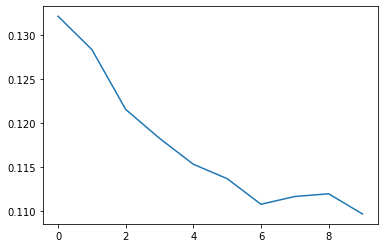

In [26]:
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)
val_dataset = core.Dataset('/content/Pen-data-set/images1/image')

losses = model.fit(loader, val_dataset, epochs=10, learning_rate=0.001, 
                   lr_step_size=5, verbose=True)
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


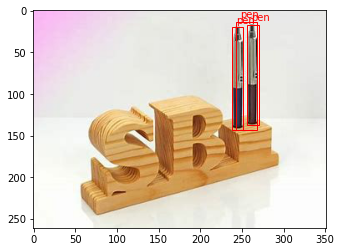

In [28]:
image = utils.read_image('/content/Pen-data-set/images1/image/a (196).jpg')
predictions = model.predict(image)
labels, boxes, scores = predictions
visualize.show_labeled_image(image, boxes, labels)

In [0]:

from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=1.0, size=(400,200)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


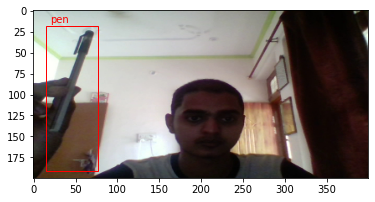

In [70]:

image = take_photo()
predictions = model.predict(image)
labels, boxes, scores = predictions
visualize.show_labeled_image(image, boxes, labels)